<a href="https://colab.research.google.com/github/christophermalone/stat360/blob/main/Handout3_PartA_ConditioningonaContinousVariable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handout #3 - Part A : Conditioning on a Continous Predictor Variable


<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## Example 3.1

Consider once again the Crater Impact study that was done here at Winona State Univeristy.  This study investigated the effect of certain variables on the size of an impact crater. 
<table>
  <tr>
    <td width='50%'>
      <ul>
        <li><strong>Response Variable</strong>: Diameter of crater (cm)</li><br>
        <li>Variables under investigation (i.e. independent variables)</li>
        <ul>
          <li>Hight from which projectile was dropped</li>
          <li>Projectile Type (glass, steel, or wood ball)</li>
          <li>Sand Type (course, fine)</li>
         </ul>
    </ul>
    </td>
    <td width='50%'>
<p align='center'><img src="https://drive.google.com/uc?export=view&id=1-969XxPtKCcG9MeX4NMRfkTUTaMoj8cY"></img></p>
  </td>
</tr>
</table>

Data Folder: [OneDrive](https://mnscu-my.sharepoint.com/:f:/g/personal/aq7839yd_minnstate_edu/EmOQfrwxzzRBqq8PH_8qTmMBy-1qKgM11Hb8vzjs025EEA?e=wyShYs)



<table width='100%' ><tr><td bgcolor='green'></td></tr></table>



Previously, for the Impact Crater dataset, we have investigated the following conditional distributions.

*    Diameter | SandType

*    Diameter | ProjectileType

In this handout, we will consider the conditional distribution of Diameter | Height.  Recall, the height is the distance from which the projectile was dropped.  It is expected that as the height of the fall increases, the diameter increases.  

**Goal**: Understand the relationship between the Diameter and the height in which the projectile was dropped. 

<p align='center'><img src="https://drive.google.com/uc?export=view&id=18tzrNl_8j_dTlB1-DLmhVo_D5npGIwr6" width="50%" height="50%"></img></p>

If the conditioning variable in numerical, the conditional distribution of the response given this variable is best displayed via a scatterplot.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1nvd5ZXPEgnMMmtOfygVW_swRet32xprC" width="50%" height="50%"></img></p>

<table width='100%'><tr><td bgcolor="purple"><font color="white" size="+2">Task</font></td></tr></table>

## Task:  Questions



1.   What is the relationship between the height in which the projectile is dropped and the diameter of the crater it creates?  Discuss.






2.   Does the mean diameter appear to change as a function of height?  Explain.


3.   Does the variance in the diameter appear to change as a function of height?  Discuss.

<table width='100%'><tr><td bgcolor="purple"><font size="+2">&nbsp;</font></td></tr></table>

## Loading Data 

First, loading the tidyverse() package into this COLAB session.

In [1]:
#load tidyverse package
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



The **read_csv()** function is used to read in the dataset. 

In [2]:
# Reading data in using read.csv via Base 
ImpactCrater <- read_csv("http://www.StatsClass.org/stat360/Datasets/ImpactCrater.csv")

Rows: 144 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): SandType, ProjectileType
dbl (3): ID, Height, Diameter

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
# View the first few rows of data
head(ImpactCrater)

ID,SandType,ProjectileType,Height,Diameter
<dbl>,<chr>,<chr>,<dbl>,<dbl>
1,Coarse,WoodBall,25,3.75
2,Coarse,WoodBall,25,3.25
3,Coarse,WoodBall,25,3.50
4,Coarse,WoodBall,50,4.80
5,Coarse,WoodBall,50,4.50
6,Coarse,WoodBall,50,4.30


### Unexplained Variation in Marginal Distribution

Consider once again the formula for the total unexplained variation in the marginal distribution of Diameter.  In words, the total unexplained variation is the sum of all the squared distances from each data point to the mean.  


$$
\begin{array}{rcl}
\mbox{SSE}_{Marginal} &  =  & \sum (Data \space Point \space - \space Mean)^2 \\
&  =  & \sum (Residuals)^2 \\
& = & (n-1) * Variance \\
\end{array}
$$

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1rhkVu8iahGapp42LBgPVfZXsuzRnQmLu" width="50%" height="50%"></img></p>


The following code provides the desired summaries for the marginal distribution.

In [4]:
# Summary statistics for the marginal distribution

(ImpactCrater 
  %>% summarize(
                  Mean = mean(Diameter),
                  'Standard Deviation' = sd(Diameter),
                  Variance = var(Diameter),
                  Count = n()                
               )
   %>% mutate('SSE_Marginal' = (Count-1)*Variance)
)

Mean,Standard Deviation,Variance,Count,SSE_Marginal
<dbl>,<dbl>,<dbl>,<int>,<dbl>
6.675694,1.724657,2.97444,144,425.3449


<u>Comment</u>:  The total amount of unexplained variation in the *marginal* 
distribution is 425.3.

### Unexplained Variation in Conditional Distribution of Diameter | Height

The first step in getting the Sum of Squared Error is to obtain an estimate of the mean diameter for each observation. Here several observations have been dropped from the **same** height; thus, an estimate of the mean is needed for each height, and the estimate of the mean will be the same for all observations at each specific height.

In [ ]:
# Getting the means for each height

(ImpactCrater 
  %>% group_by(Height)
  %>% summarize(
                  Mean = mean(Diameter),
               )
)

Height,Mean
<dbl>,<dbl>
25,4.983333
50,5.752778
75,6.238889
100,6.658333
125,7.005556
150,7.327778
175,7.544444
200,7.894444


A plot of the average diameter for each height is provided next.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1DZ2sq9fmdUXMzfF_UNRZYeRsOhCcR7V1" width="50%" height="50%"></img></p>

The total amount of unexplained variation is computed using the residuals across all heights.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=12pyLDfPK07DBDz7Zr3MjR-29qpqmnZCz" width="50%" height="50%"></img></p>


The following code provides the desired summaries for the conditional distribution.

In [5]:
#Getting the relevent summary statistics for conditional distribution

(ImpactCrater 
  %>% group_by(Height)
  %>% summarize(
                  Mean = mean(Diameter),
                  'Standard Deviation' = sd(Diameter),
                  Variance = var(Diameter),
                  Count = n()                
               )
   %>% mutate('SSE_EachHeight' = (Count-1)*Variance)
) -> SSE

SSE

Height,Mean,Standard Deviation,Variance,Count,SSE_EachHeight
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
25,4.983333,1.149424,1.321176,18,22.46000
50,5.752778,1.202506,1.446021,18,24.58236
75,6.238889,1.299837,1.689575,18,28.72278
100,6.658333,1.561226,2.437426,18,41.43625
125,7.005556,1.534878,2.355850,18,40.04944
150,7.327778,1.642113,2.696536,18,45.84111
175,7.544444,1.689491,2.854379,18,48.52444
200,7.894444,1.773488,3.145261,18,53.46944


In [6]:
#@title Getting the IRdisplay package
# install the IRdisplay package
install.packages("IRdisplay")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
#@title Loading IRdisplay
#load IRdisplay
library(IRdisplay)

In [8]:
#@title Display SSE Table
#using display_html to print table
display_html('
              <table border="1" align="center">
              <tr>
                <th align="center" valign="top" rowspan="2">Marginal <br>Distribution</th>
                <th align="center" valign="top" colspan="8">Conditional Distribution of Diameter | Height</th>
              </tr>
              <tr>
                <td align="center" valign="bottom">Height=25</td>
                <td align="center" valign="bottom">Height=50</td>
                <td align="center" valign="bottom">Height=75</td>
                <td align="center" valign="bottom">Height=100</td>
                <td align="center" valign="bottom">Height=125</td>
                <td align="center" valign="bottom">Height=150</td>
                <td align="center" valign="bottom">Height=175</td>
                <td align="center" valign="bottom">Height=200</td>
              </tr>
              <tr>
                <td align="center" valign="top" rowspan="2">425.35</td>
                <td align="center" valign="bottom">22.46</td>
                <td align="center" valign="bottom">24.58</td>
                <td align="center" valign="bottom">28.72</td>
                <td align="center" valign="bottom">41.44</td>
                <td align="center" valign="bottom">40.05</td>
                <td align="center" valign="bottom">45.84</td>
                <td align="center" valign="bottom">48.52</td>
                <td align="center" valign="bottom">53.46</td>
              </tr>
              <tr>
                 <td align="center" valign="top" colspan="8">Total = 305.1</td>
              </tr>
            </table>    
            ')

Marginal Distribution 
 Conditional Distribution of Diameter | Height 
 
 
 Height=25 
 Height=50 
 Height=75 
 Height=100 
 Height=125 
 Height=150 
 Height=175 
 Height=200 
 
 
 425.35 
 22.46 
 24.58 
 28.72 
 41.44 
 40.05 
 45.84 
 48.52 
 53.46 
 
 
 Total = 305.1

Getting R to compute the total SSE across all heights.

In [9]:
# Computing the total SSE across all heights
cat("\n\nTotal Unexplained Variation Across all Heights\n\n")
(SSE
  %>% summarize(
                 SSE_Conditional = sum(SSE_EachHeight)
                )
)



Total Unexplained Variation Across all Heights



SSE_Conditional
<dbl>
305.0858


<u>Comment</u>:  The total amount of unexplained variation in the *conditional* distribution is 305.1.

### Computing $R^2$

he $R^2$ is computed as follows

$$
\begin{array}{rcl}
R^2 & = & \frac{\mbox{Total Unexplained Variation in Marginal} - \mbox{Total Unexplained Variation in Conditional}}{\mbox{Total Unexplained Variation in Marginal}} \\
    & = & \frac{425.3 - 305.1}{425.3} \\ 
    & = & 0.2826 \\ 
\end{array}
$$

<u>Interpretation</u>: About 28\% of the variation in Diameter can be explained by considering the height in which the projectile was dropped from.

### Creating a Plot with the Conditional Means

In [10]:
#@title Getting Conditional Means
# Getting the conditional means
#  A LeftSide & RightSide variable will be used to create the bar

ImpactCraterMeans <- (ImpactCrater 
  %>% group_by(Height)
  %>% summarize(
                 Mean = mean(Diameter),                
               )
  %>% mutate(
              LeftSide = Height - 10,
              RightSide = Height + 10
            )
)
ImpactCraterMeans

Height,Mean,LeftSide,RightSide
<dbl>,<dbl>,<dbl>,<dbl>
25,4.983333,15,35
50,5.752778,40,60
75,6.238889,65,85
100,6.658333,90,110
125,7.005556,115,135
150,7.327778,140,160
175,7.544444,165,185
200,7.894444,190,210


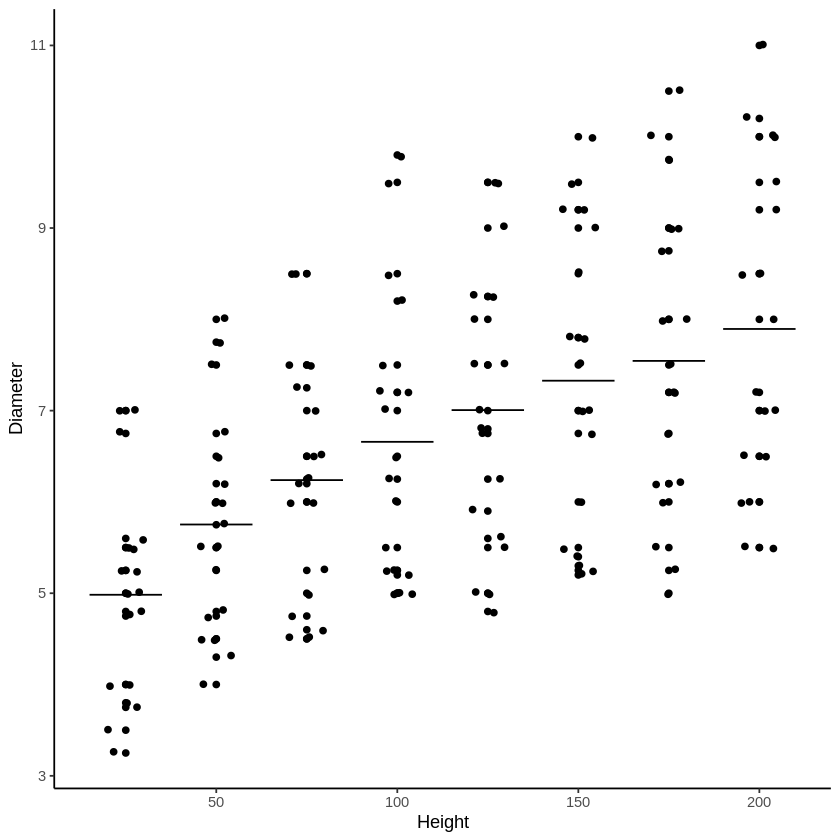

In [11]:
#@title Plotting the Conditional Means
# Using ggplot() to plot the means for each height
# The geom_segment() is used to create segments for each mean
ggplot(data=ImpactCrater, aes(x=Height,y=Diameter) ) + 
  geom_point() + 
  geom_jitter(width=5) +  #Add a little jitter to the points
  theme_classic() +
  geom_segment(data = ImpactCraterMeans, aes(x = LeftSide, y = Mean, xend = RightSide, yend = Mean)) #Used to create the line segments for each conditional mean

### Conditional Distribution of Diameter | (Height, ProjectileType)

Again, to compute an $R^2$ value one needs the total amount of unexplained variation in the *marginal* distribution and the total amount of unexplained variation in the *conditional* distribution. 

In [12]:
# Computing the SSE in marginal distribution

(ImpactCrater 
  %>% summarize(
                  Mean = mean(Diameter),
                  'Standard Deviation' = sd(Diameter),
                  Variance = var(Diameter),
                  Count = n()                
               )
   %>% mutate('SSE_Marginal' = (Count-1)*Variance)
)

Mean,Standard Deviation,Variance,Count,SSE_Marginal
<dbl>,<dbl>,<dbl>,<int>,<dbl>
6.675694,1.724657,2.97444,144,425.3449


Next, computing the total amount of unexplained variation in the conditional distribution.

In [13]:
# Computing the SSE in the conditional distribution
(ImpactCrater 
  %>% group_by(Height, ProjectileType)
  %>% summarize(
                  Mean = mean(Diameter),
                  Variance = var(Diameter),
                  Count = n(),     
               )
   %>% mutate(SSE = (Count-1)*Variance)
   %>% ungroup()
) -> SSE

SSE

`summarise()` has grouped output by 'Height'. You can override using the
`.groups` argument.


Height,ProjectileType,Mean,Variance,Count,SSE
<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>
25,GlassBall,5.191667,0.14841667,6,0.7420833
25,SteelBall,6.041667,0.93541667,6,4.6770833
25,WoodBall,3.716667,0.08666667,6,0.4333333
50,GlassBall,5.783333,0.12666667,6,0.6333333
50,SteelBall,7.000000,0.87500000,6,4.3750000
50,WoodBall,4.475000,0.08775000,6,0.4387500
75,GlassBall,6.241667,0.05041667,6,0.2520833
75,SteelBall,7.708333,0.41041667,6,2.0520833
75,WoodBall,4.766667,0.09166667,6,0.4583333


Letting R compute the total amount of unexplained variation across all heights and projectile type combinations.

In [14]:
# Computing the total SSE across all heights and projectile types
cat("\n\nTotal Unexplained Variation\n\n")
(SSE
  %>% ungroup()
  %>% summarize(
                 SSE_Conditional = sum(SSE)
                )
)



Total Unexplained Variation



SSE_Conditional
<dbl>
44.21083


Computing the updated $R^2$ value when conditioning on both Height and Projectile Type. 

$$
\begin{array}{rcl}
R^2 & = & \frac{\mbox{Total Unexplained Variation in Marginal} - \mbox{Total Unexplained Variation in Conditional}}{\mbox{Total Unexplained Variation in Marginal}} \\
    & = & \frac{425.3 - 44.2}{425.3} \\ 
    & = & \frac{381.1}{425.3} \\ 
    & = & 0.8961 \\ 
\end{array}
$$

<u>Interpretation</u>: About 90 \% of the variation in Diameter can be explained by considering the height from which the projectile was dropped from and the projectile type.

### Updating the Plot with the Conditional Means

The following code can be used to update the plot for the Conditional Distribution of Diameter | (Height, ProjectileType).

`summarise()` has grouped output by 'Height'. You can override using the
`.groups` argument.


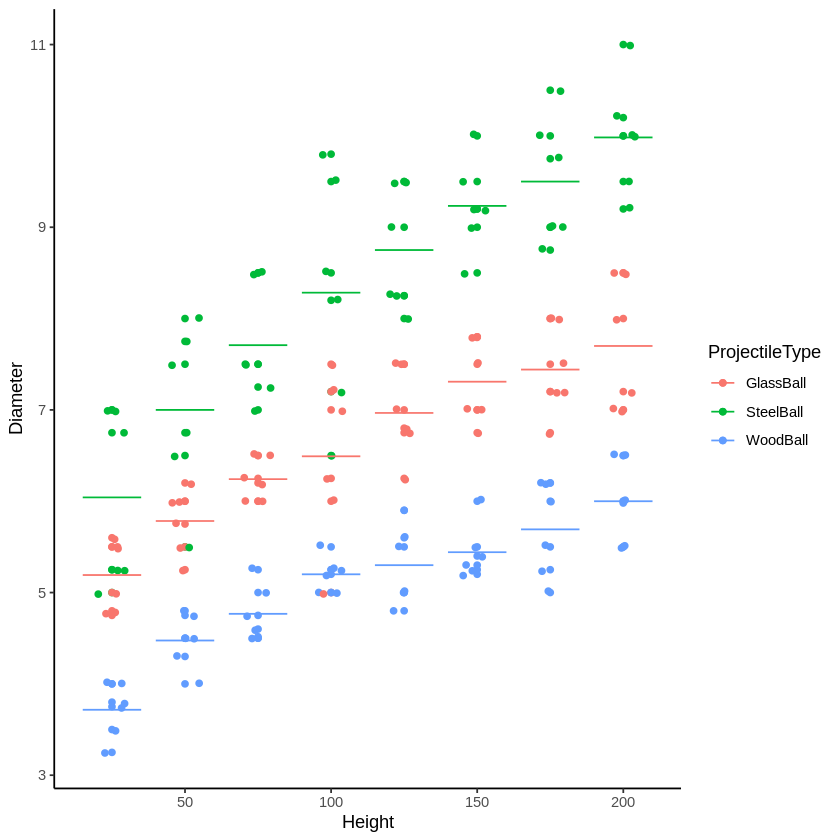

In [15]:
#@title Plot of Diameter | (Height, ProjectileType)
#Get the means for each Height/ ProjectileType combination
(ImpactCrater 
  %>% group_by(Height, ProjectileType)
  %>% summarize(
                 Mean = mean(Diameter),                
               )
  %>% mutate(
              LeftSide = Height - 10,
              RightSide = Height + 10
            )
  %>% ungroup()
) -> ImpactCraterMeans

#Creating the plot
ggplot(data=ImpactCrater, aes(x=Height,y=Diameter, color=ProjectileType)) + 
  geom_point() + 
  geom_jitter(width=5) +  #Add a little jitter to the points
  theme_classic() + 
  geom_segment(data = ImpactCraterMeans, aes(x = LeftSide, y = Mean, xend = RightSide, yend = Mean)) #Used to create the line segments for each conditional mean



---



---



<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## Example 3.2

Consider data from the Nenana Ice Classic -- Alaska's greatest guessing game!  Those participating must guess the date and time the ice will go out on the Tanana River in Nenana, AL.  Tens of thousands of dollars in prize money are awarded each year.
<table>
  <tr>
    <td width='50%'>
      <ul>
        <li><strong>Response Variable</strong>: DayIntoYear</li><br>
        <li><strong>Predictor Variable</strong>: Year</li>
    </ul>
    </td>
    <td width='50%'>
<p align='center'><img src="https://drive.google.com/uc?export=view&id=16BxddrJYtjIlbKJnKbAiCdVOlnyvameU"></img></p>
  </td>
</tr>
</table>

Nenana Ice Classic Website: [Link](https://www.nenanaakiceclassic.com/)

Data Folder: [OneDrive](https://mnscu-my.sharepoint.com/:f:/g/personal/aq7839yd_minnstate_edu/EmOQfrwxzzRBqq8PH_8qTmMBy-1qKgM11Hb8vzjs025EEA?e=wyShYs)



<table width='100%' ><tr><td bgcolor='green'></td></tr></table>



Reading the Nenana data into this COLAB session.

In [16]:
# Reading data in using read.csv via Base 
Nenana <- read_csv("http://www.StatsClass.org/stat360/Datasets/Nenana.csv")

Rows: 106 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): DateTime
dbl (2): Year, DayIntoYear

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Taking a look at the most recent years and the Date/Time of the ice out.

In [17]:
tail(Nenana)

Year,DayIntoYear,DateTime
<dbl>,<dbl>,<chr>
2017,121.5000,May 01 at 12:00 (noon)
2018,121.5541,May 01 at 13:18
2019,103.0146,April 13 at 00:21
2020,118.5389,April 27 at 12:56
2021,120.5347,April 30 at 12:50
2022,122.7826,May 02 at 18:47


Consider only the data from the last 20 years.  A filter() is used to select only the 20 most recent years of data.

In [58]:
( Nenana
   %>% filter(Year > 2002)
) -> Nenana_MostRecent

Nenana_MostRecent

Year,DayIntoYear,DateTime
<dbl>,<dbl>,<chr>
2003,119.7656,April 29 at 18:22
2004,115.5944,April 24 at 14:16
2005,118.5007,April 28 at 12:01
2006,122.7285,May 2 at 17:29
2007,117.6160,April 27 at 14:47
2008,126.9535,May 5 at 22:53
2009,121.8618,May 1 at 20:41
2010,119.3792,April 29 at 9:06
2011,124.6833,May 4 at 16:24


Next, consider a line graph showing the relationship between DayIntoYear and Year over the last 20 years.

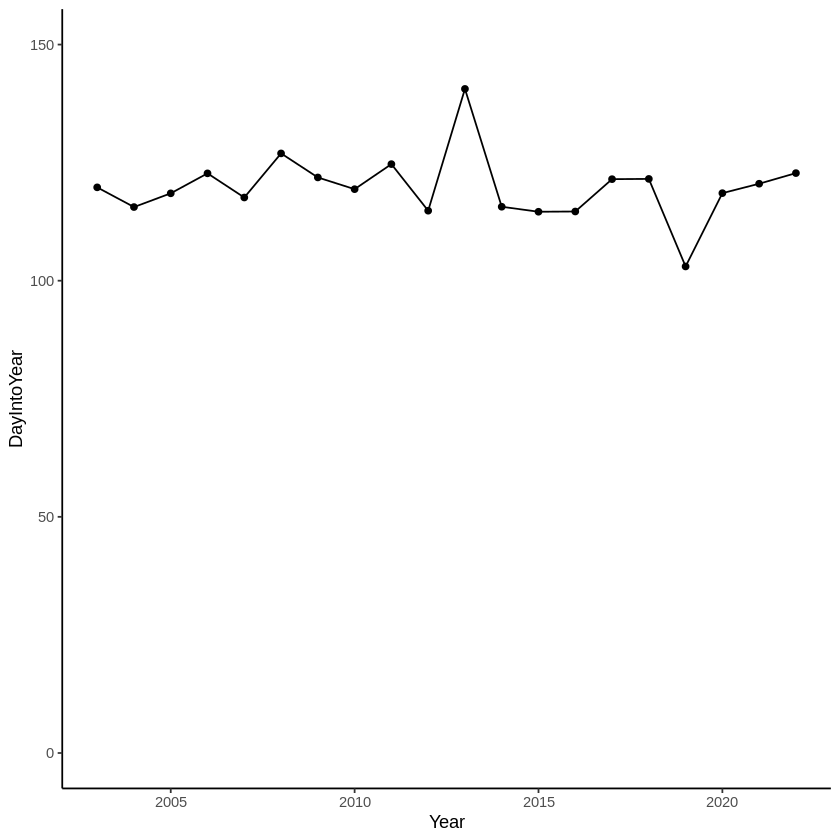

In [27]:
# Plot of DayIntoYear vs Year
ggplot(data=Nenana_MostRecent, aes(x=Year,y=DayIntoYear) ) + 
  geom_point() +
  geom_line() + 
  ylim(0, 150) + 
  theme_classic()

First, computing the total amount of unexplained variation in the marginal distribution.

In [34]:
# Computing the SSE in marginal distribution

(Nenana_MostRecent 
  %>% summarize(
                  Mean = mean(DayIntoYear),
                  'Standard Deviation' = sd(DayIntoYear),
                  Variance = var(DayIntoYear),
                  Count = n()                
               )
   %>% mutate('SSE_Marginal' = (Count-1)*Variance)
)

Mean,Standard Deviation,Variance,Count,SSE_Marginal
<dbl>,<dbl>,<dbl>,<int>,<dbl>
119.7674,7.031994,49.44895,20,939.53


<u>Comment</u>:  The total amount of unexplained variation in the *marginal* 
distribution is 939.5.

Next, the total amount of unexplained variation in the conditional distibution must be obtained.

In [48]:
# Getting the conditional means
 (Nenana_MostRecent 
    %>% group_by(Year)
    %>% summarize(
                   Mean = mean(DayIntoYear)              
                 )
)

Year,Mean
<dbl>,<dbl>
2003,119.7656
2004,115.5944
2005,118.5007
2006,122.7285
2007,117.6160
2008,126.9535
2009,121.8618
2010,119.3792
2011,124.6833


Consider a plot of the conditional means.

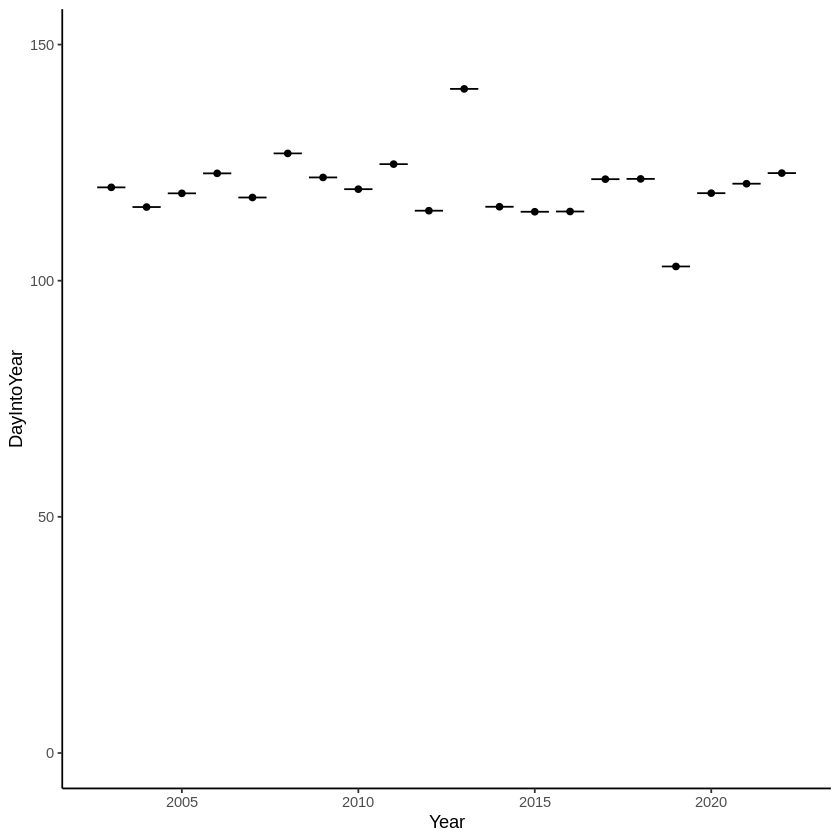

In [25]:
# Getting the conditional means
 (Nenana_MostRecent 
    %>% group_by(Year)
    %>% summarize(
                   Mean = mean(DayIntoYear),                
                 )
     %>% mutate(
                 LeftSide = Year - 0.40,
                 RightSide = Year + 0.40
                )
) -> DayIntoYearMeans

# Using ggplot() to plot the means for each Year
# The geom_segment() is used to create segments for each mean
ggplot(data=Nenana_MostRecent, aes(x=Year,y=DayIntoYear) ) + 
  geom_point() + 
  geom_segment(data = DayIntoYearMeans, aes(x = LeftSide, y = Mean, xend = RightSide, yend = Mean)) + #Used to create the line segments for each conditional mean
  ylim(0, 150) + 
  theme_classic() 
  

There is a **problem** -- when observations are not replicated in the conditional distribution, there is *no independent measure of error*. 

In [39]:
# Computing the SSE in the conditional distribution
(Nenana_MostRecent 
  %>% group_by(Year)
  %>% summarize(
                  Mean = mean(DayIntoYear),
                  Variance = var(DayIntoYear),
                  Count = n(),     
               )
   %>% mutate(SSE = (Count-1)*Variance)
   %>% ungroup()
) -> SSE

SSE

# Computing the total SSE across all heights and projectile types
cat("\n\nTotal Unexplained Variation\n\n")
(SSE
  %>% ungroup()
  %>% summarize(
                 SSE_Conditional = sum(SSE)
                )
)

Year,Mean,Variance,Count,SSE
<dbl>,<dbl>,<dbl>,<int>,<dbl>
2003,119.7656,NA,1,NA
2004,115.5944,NA,1,NA
2005,118.5007,NA,1,NA
2006,122.7285,NA,1,NA
2007,117.6160,NA,1,NA
2008,126.9535,NA,1,NA
2009,121.8618,NA,1,NA
2010,119.3792,NA,1,NA
2011,124.6833,NA,1,NA




Total Unexplained Variation



SSE_Conditional
<dbl>
NA


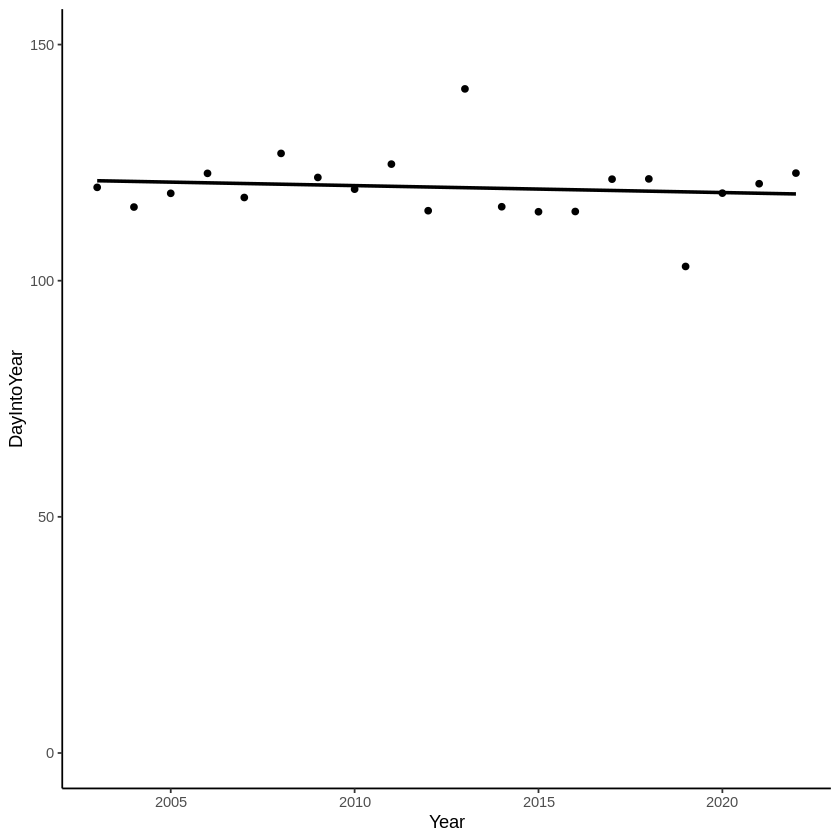

In [42]:
# Using ggplot() to plot the means for each Year
# The geom_segment() is used to create segments for each mean
ggplot(data=Nenana_MostRecent, aes(x=Year,y=DayIntoYear) ) + 
  geom_point() + 
  geom_smooth(method="lm", formula=y~x, se = FALSE, col="black") + 
  ylim(0, 150) + 
  theme_classic() 

The following code will obtain an estimate for each year using a simple linear model.

In [59]:
#Fitting a simple linear model to the data
LMModel_DayIntoYear_Year <- lm(DayIntoYear ~ Year, data=Nenana_MostRecent)

#Getting estimated mean (predicted) for each Year
(Nenana_MostRecent
   %>%  mutate(
               Predicted_DayIntoYear = predict(LMModel_DayIntoYear_Year, newdata = Nenana_MostRecent )
   )
) -> Nenana_MostRecent_Means

Nenana_MostRecent_Means

Year,DayIntoYear,DateTime,Predicted_DayIntoYear
<dbl>,<dbl>,<chr>,<dbl>
2003,119.7656,April 29 at 18:22,121.1661
2004,115.5944,April 24 at 14:16,121.0188
2005,118.5007,April 28 at 12:01,120.8716
2006,122.7285,May 2 at 17:29,120.7244
2007,117.6160,April 27 at 14:47,120.5772
2008,126.9535,May 5 at 22:53,120.4299
2009,121.8618,May 1 at 20:41,120.2827
2010,119.3792,April 29 at 9:06,120.1355
2011,124.6833,May 4 at 16:24,119.9883


Next, the residual (or error) can be estimated by considering the difference between the data point and the mean which is estimated by the simple linear model. 

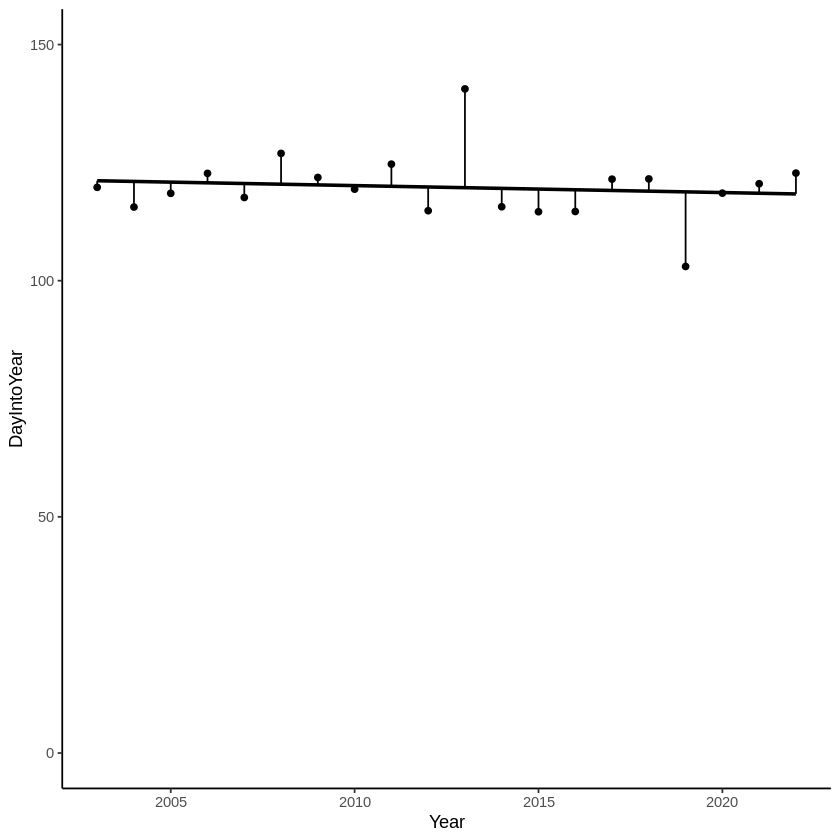

In [61]:
# Using ggplot() to plot the means for each Year
# The geom_segment() is used to create segments for each mean
ggplot(data=Nenana_MostRecent_Means, aes(x=Year,y=DayIntoYear) ) + 
  geom_point() + 
  geom_smooth(method="lm", formula=y~x, se = FALSE, col="black") + 
  geom_segment(aes(x = Year, y = DayIntoYear, xend = Year, yend = Predicted_DayIntoYear)) + #Used to create the line segments for each conditional mean
  ylim(0, 150) + 
  theme_classic() 

The total amount of unexplained variation can be computing using the residual values from this plot.

$$
\mbox{Total Amount of Unexplained Variation} = \sum (Residual)^2
$$

In [67]:
#Fitting a simple linear model to the data
LMModel_DayIntoYear_Year <- lm(DayIntoYear ~ Year, data=Nenana_MostRecent)

#Getting estimated mean (predicted) for each Year
(Nenana_MostRecent
   %>%  mutate(
               Predicted_DayIntoYear = predict(LMModel_DayIntoYear_Year, newdata = Nenana_MostRecent ),
               Residual_DayIntoYear = (DayIntoYear - Predicted_DayIntoYear),
               Residual_Squared =  Residual_DayIntoYear^2
   )
) -> Nenana_MostRecent_SSE

Nenana_MostRecent_SSE

cat("\n\nTotal Amount of Unexplained Variation\n\n")
(Nenana_MostRecent_SSE
  %>% summarize(
                  SSE_Conditional = sum(Residual_Squared)
  )
)

Year,DayIntoYear,DateTime,Predicted_DayIntoYear,Residual_DayIntoYear,Residual_Squared
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2003,119.7656,April 29 at 18:22,121.1661,-1.4004686,1.9613122
2004,115.5944,April 24 at 14:16,121.0188,-5.4244445,29.4245983
2005,118.5007,April 28 at 12:01,120.8716,-2.3709205,5.6212638
2006,122.7285,May 2 at 17:29,120.7244,2.0041036,4.0164313
2007,117.6160,April 27 at 14:47,120.5772,-2.9611723,8.7685416
2008,126.9535,May 5 at 22:53,120.4299,6.5235517,42.5567272
2009,121.8618,May 1 at 20:41,120.2827,1.5790758,2.4934803
2010,119.3792,April 29 at 9:06,120.1355,-0.7563002,0.5719899
2011,124.6833,May 4 at 16:24,119.9883,4.6950239,22.0432495




Total Amount of Unexplained Variation



SSE_Conditional
<dbl>
925.1161


Computing the updated $R^2$ value when conditioning on Year.

$$
\begin{array}{rcl}
R^2 & = & \frac{\mbox{Total Unexplained Variation in Marginal} - \mbox{Total Unexplained Variation in Conditional}}{\mbox{Total Unexplained Variation in Marginal}} \\
    & = & \frac{939.5 - 925.1}{939.5} \\ 
    & = & \frac{14.4}{939.5} \\ 
    & = & 0.01534 \\ 
\end{array}
$$

<u>Interpretation</u>: About 1.5\% of the variation in DayIntoYear can be explained by considering Year.

### Getting Summaries of the Simple Linear Model

First, fitting the simple linear model.

In [71]:
#Fitting a simple linear model to the data
LMModel_DayIntoYear_Year <- lm(DayIntoYear ~ Year, data=Nenana_MostRecent)
LMModel_DayIntoYear_Year


Call:
lm(formula = DayIntoYear ~ Year, data = Nenana_MostRecent)

Coefficients:
(Intercept)         Year  
   416.0559      -0.1472  


Next, consider the output provided by the summary() function.

In [72]:
#Gettting a summary() of the linear model object
summary(LMModel_DayIntoYear_Year)


Call:
lm(formula = DayIntoYear ~ Year, data = Nenana_MostRecent)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.7959  -4.0663  -0.4403   2.4454  20.9180 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) 416.0559   559.4854   0.744    0.467
Year         -0.1472     0.2780  -0.530    0.603

Residual standard error: 7.169 on 18 degrees of freedom
Multiple R-squared:  0.01534,	Adjusted R-squared:  -0.03936 
F-statistic: 0.2805 on 1 and 18 DF,  p-value: 0.6029


The unexplained (and explanined) variation quantites can be obtained using the anova() function in R.

In [73]:
#Getting the unexplained variation quantities using anova()
anova(LMModel_DayIntoYear_Year)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Year,1,14.41382,14.41382,0.28045,0.6028776
Residuals,18,925.11614,51.39534,NA,NA


---



---
End of Document
